## Lab Agenda:
- To detect anomalous (fraudulent or unusual) transactions in the given dataset using:
1. Model-based anomaly detection (3σ Rule)
2. Proximity-based anomaly detection (K-Nearest Neighbors)

In [1]:
# model based anomaly example:

import numpy as np

dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

def detect_outliers(data):
    outliers = []
    mean = np.mean(data)
    std = np.std(data)
    
    # Define upper and lower limits using 3-sigma rule
    lower_limit = mean - 3 * std
    upper_limit = mean + 3 * std
    
    for value in data:
        if value < lower_limit or value > upper_limit:
            outliers.append(value)
    
    return outliers

# Detect outliers
outlier_points = detect_outliers(dataset)
print("Outliers:", outlier_points)

Outliers: [102, 107, 108]


In [2]:
import pandas as pd

In [3]:
# import dataset
df=pd.read_csv("cartwiz_transactions.csv")

df

,tx_id,amount,customer_age,account_age_months,location,is_fraud
0,T0001,266.985931,38,103,Los Angeles,0
1,T0002,330.925984,41,117,Chicago,0
2,T0003,632.433368,47,38,New York,0
3,T0004,51.641648,29,58,Los Angeles,0
4,T0005,50.222218,45,60,New York,0
...,...,...,...,...,...,...
495,T0496,24.318174,47,57,Chicago,0
496,T0497,2000.000000,53,25,Chicago,0
497,T0498,351.397026,57,8,Chicago,0
498,T0499,725.281649,57,23,Los Angeles,0


In [4]:
df.location.value_counts()

location
New York       210
Chicago         98
Los Angeles     97
Moscow          54
Beijing         41
Name: count, dtype: int64

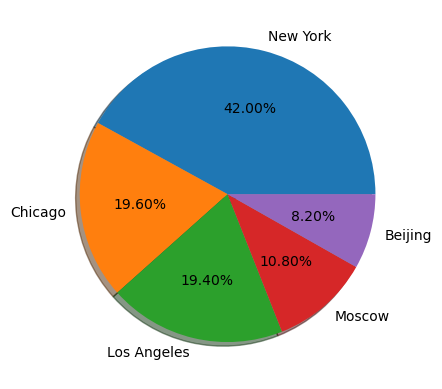

In [5]:
import matplotlib.pyplot as plt

plt.pie(df['location'].value_counts(), autopct= '%0.2f%%', labels=['New York','Chicago','Los Angeles','Moscow','Beijing'], shadow=True)
plt.show()

In [6]:
# Perform Data Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['location_encoded']=label_encoder.fit_transform(df.iloc[:,4])

In [8]:
df['location'].value_counts()

location
New York       210
Chicago         98
Los Angeles     97
Moscow          54
Beijing         41
Name: count, dtype: int64

In [9]:
## Scale numerical features

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['amount', 'customer_age', 'account_age_months']] = scaler.fit_transform(df[['amount', 'customer_age', 'account_age_months']])

df

,tx_id,amount,customer_age,account_age_months,location,is_fraud,location_encoded
0,T0001,-0.038273,-0.075236,1.202047,Los Angeles,0,2
1,T0002,0.035284,0.174994,1.603035,Chicago,0,1
2,T0003,0.382142,0.675452,-0.659683,New York,0,4
3,T0004,-0.286008,-0.825923,-0.086843,Los Angeles,0,2
4,T0005,-0.287641,0.508632,-0.029559,New York,0,4
...,...,...,...,...,...,...,...
495,T0496,-0.317441,0.675452,-0.115485,Chicago,0,1
496,T0497,1.955406,1.175910,-1.032028,Chicago,0,1
497,T0498,0.058834,1.509549,-1.518942,Chicago,0,1
498,T0499,0.488955,1.509549,-1.089312,Los Angeles,0,2


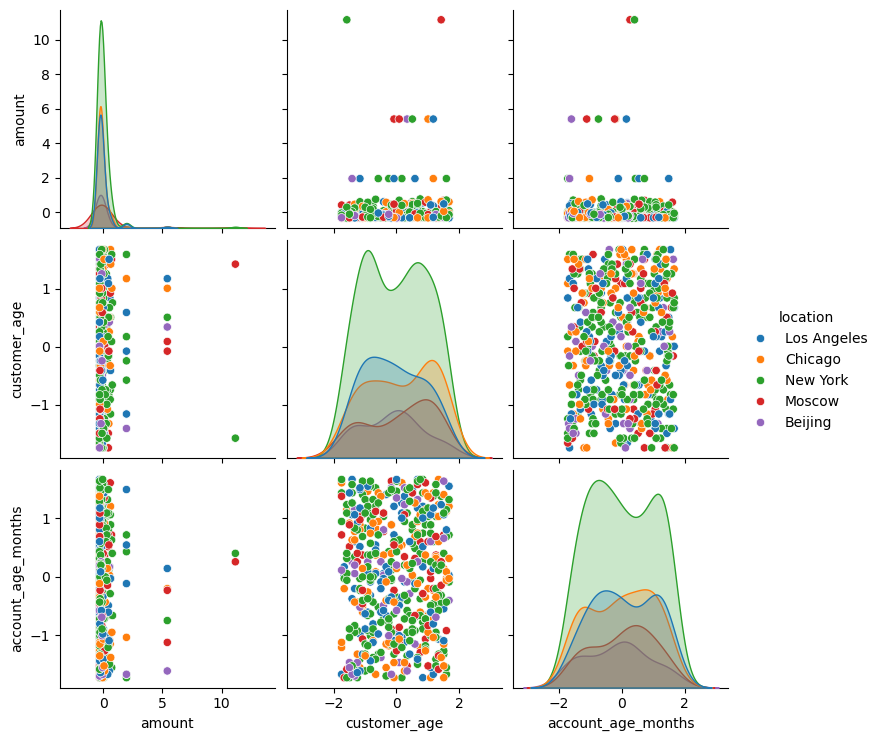

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns  

numeric_features = ['amount', 'customer_age', 'account_age_months']

sns.pairplot(df[['amount', 'customer_age', 'account_age_months', 'location']] ,hue='location')
plt.show()

In [12]:
## Flag anomalies based on Model anomaly detection (3-sigma rule)

In [13]:
mean_amount = df['amount'].mean()

mean_amount

np.float64(-2.1316282072803006e-17)

In [14]:
std_amount = df['amount'].std()

In [15]:
mean_amount = df['amount'].mean()
std_amount = df['amount'].std()
lower = mean_amount - 3 * std_amount
upper = mean_amount + 3 * std_amount
df['is_anomaly_3sigma'] = ((df['amount'] < lower) | (df['amount'] > upper)).astype(int)


***

In [ ]:
## Flag anomalies based on Proximity anomaly detection (KNN-based anomaly detection)

In [16]:
from sklearn.neighbors import NearestNeighbors

In [26]:
X = np.array([[3, 3], [1, 2], [2, 3], [10, 10]])

<Axes: >

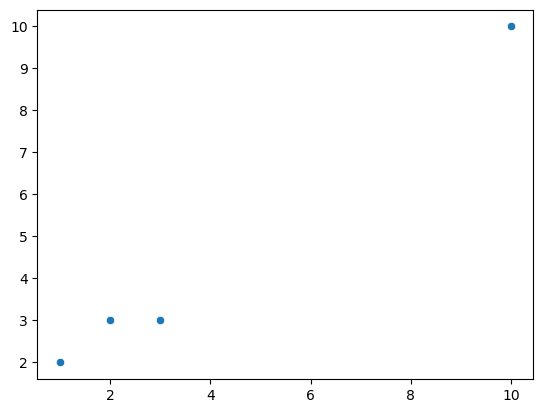

In [27]:
sns.scatterplot(x=X[:,0], y=X[:,1])

In [40]:
import numpy as np

# Create model for 3 nearest neighbors
knn = NearestNeighbors(n_neighbors=4)

# Fit the model
knn.fit(X)

# Find nearest neighbors of each point
distances, indices = knn.kneighbors(X)

print(distances)

[[ 0.          1.          2.23606798  9.89949494]
 [ 0.          1.41421356  2.23606798 12.04159458]
 [ 0.          1.          1.41421356 10.63014581]
 [ 0.          9.89949494 10.63014581 12.04159458]]


In [37]:
indices

array([[0, 2, 1],
       [1, 2, 0],
       [2, 0, 1],
       [3, 0, 2]])

In [38]:
x= (1.41421356 +2.23606798)/3
x

1.2167605133333332

In [39]:
knn_scores = distances.mean(axis=1)

knn_scores

array([1.07868933, 1.21676051, 0.80473785, 6.84321358])

In [22]:
# Threshold at 99th percentile
threshold_knn = np.percentile(knn_scores, 99)
outlier_mask_knn = (knn_scores > threshold_knn).astype(int)
outlier_mask_knn

array([0, 0, 0, 1])

In [32]:
x_scaled

,amount,customer_age,account_age_months
0,-0.038273,-0.075236,1.202047
1,0.035284,0.174994,1.603035
2,0.382142,0.675452,-0.659683
3,-0.286008,-0.825923,-0.086843
4,-0.287641,0.508632,-0.029559
...,...,...,...
495,-0.317441,0.675452,-0.115485
496,1.955406,1.175910,-1.032028
497,0.058834,1.509549,-1.518942
498,0.488955,1.509549,-1.089312


In [30]:
k = 5
knn = NearestNeighbors(n_neighbors=k)
x_scaled = df[['amount','customer_age',	'account_age_months']]
knn.fit(x_scaled)

# Compute average distance to k nearest neighbors
distances, _ = knn.kneighbors(x_scaled)

knn_scores = distances.mean(axis=1)

# Threshold at 99th percentile
threshold_knn = np.percentile(knn_scores, 99)
outlier_mask_knn = (knn_scores > threshold_knn).astype(int)

In [31]:
distances

array([[0.        , 0.28823312, 0.30142862, 0.31425547, 0.33486658],
       [0.        , 0.26051088, 0.32018963, 0.3701978 , 0.38871599],
       [0.        , 0.40259215, 0.42368155, 0.48393603, 0.4918448 ],
       ...,
       [0.        , 0.37449639, 0.40195415, 0.40745557, 0.43126056],
       [0.        , 0.32874619, 0.51571817, 0.5494795 , 0.57044785],
       [0.        , 0.19847405, 0.26036087, 0.27366297, 0.31290603]])

In [41]:
knn_scores

array([1.07868933, 1.21676051, 0.80473785, 6.84321358])

In [24]:
df['is_anomaly_knn']= outlier_mask_knn 
df['is_anomaly_knn'].value_counts()

is_anomaly_knn
0    495
1      5
Name: count, dtype: int64

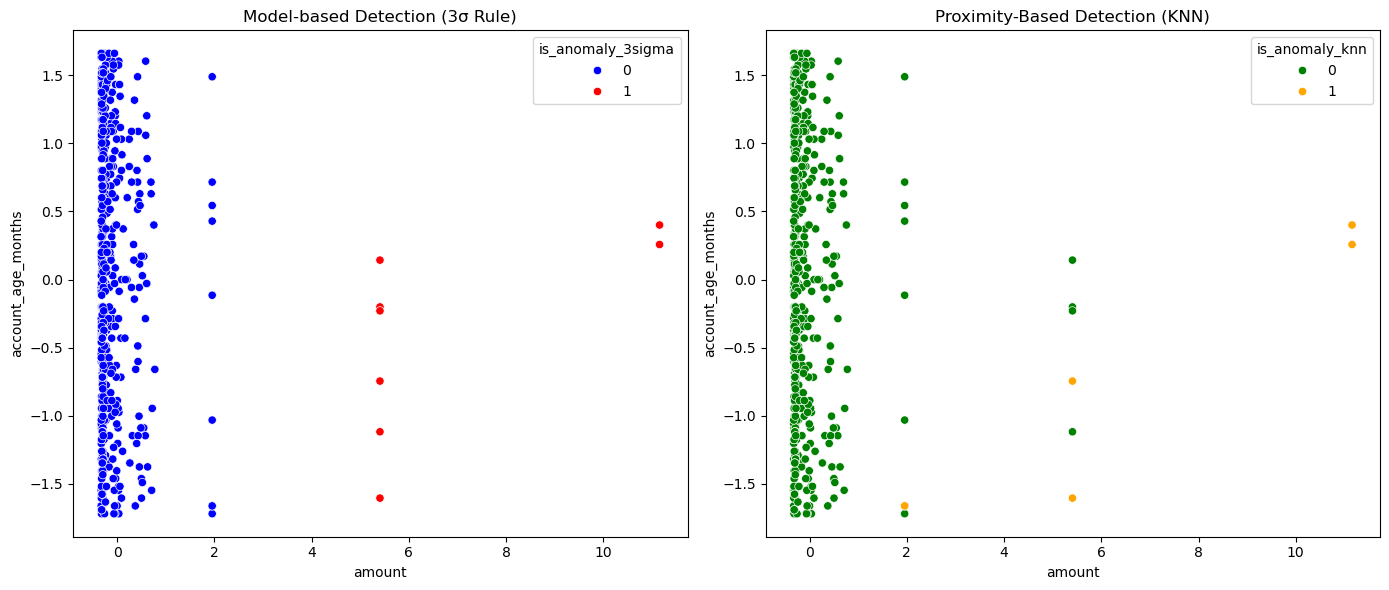

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 3σ Rule visualization
sns.scatterplot(
    data=df,
    x="amount", y="account_age_months",
    hue="is_anomaly_3sigma", palette={0: "blue", 1: "red"},
    ax=axes[0]
)
axes[0].set_title("Model-based Detection (3σ Rule)")

# KNN visualization
sns.scatterplot(
    data=df,
    x="amount", y="account_age_months",
    hue="is_anomaly_knn", palette={0: "green", 1: "orange"},
    ax=axes[1]
)
axes[1].set_title("Proximity-Based Detection (KNN)")

plt.tight_layout()
plt.show()